# Protocol for experiment 41 "$\beta$-Zerfall"

**Date:** {2023-MM-DD}  
**Version:** {1 for 1st assignment, 2 for corrected assignment, ...}
 
 - **Student 1:** {full name}
 - **Student 2:** {full name}

## 1. Introduction

### 1.1 Introduction to the experiment

- What is the experiment about? What is the objective?

### 1.2 Summary of theory

- Explanation of the formulas used incl. variable labeling (example from preliminary experiment)
    - Representation e.g. by  
    "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" $\rightarrow$ 
    $$T=2\pi\sqrt{\frac{L}{g}}$$  
    where $T$ is the period of oscillation of the pendulum for one oscillation, $L$ is the length of the pendulum, and $g$ is the acceleration due to gravity.
    - $$\phi = A \exp(-\frac{\gamma t}{2})\cos(\omega t + \alpha)$$
    where $\phi$ is the displacement of the oscillation, $A$ is the original amplitude of the oscillation, $\gamma$ is the coefficient of friction, and $\omega$ is the angular frequency.

### 1.3 Tasks

- What are the tasks for the experiment?

### 1.4 Environmental relevance

- How is the experiment relevant to your studies in environmental science? (1-2 sentences)

## 2. Packages and Functions

### 2.1 Load packages
You may not use all of these packages. You can comment out the ones you don't need.

In [1]:
# import packages  (not every package is used in each notebook template)

# numerical computing
import numpy as np                    # Fundamental package for numerical computing in Python

# uncertainty calculations
from uncertainties import ufloat      # For handling numbers with uncertainties
from uncertainties.umath import *     # For applying mathematical functions with uncertainties
from uncertainties import unumpy      # For handling uncertainties in arrays

# data manipulation and analysis
import pandas as pd                   # Powerful data manipulation and analysis library

# data visualization in tables
from tabulate import tabulate

# data visualization in plots
import matplotlib.pyplot as plt       # Library for creating static, interactive, and animated visualizations

# scientific computing
import scipy as sc                    # Open-source scientific computing library
from scipy.stats import linregress    # For performing linear regression analysis
from scipy.constants import R         # Physical and mathematical constants

# interactive display in Jupyter Notebook
from IPython.display import display, Markdown, Image   # For displaying rich content (e.g., Markdown) in Jupyter Notebook

# standard mathematical functions
import math                          # Python's built-in math functions

# widgets (to create elements such as dynamic input/output boxes)
import ipywidgets as widgets




### 2.2 Define functions

In [2]:
# example: 

def my_function(param1_placeholder, param2_placeholder):
    
    value = 'Replace with your calculation'
    return value

#### Creating a table

In [3]:
#----------------------------------------------
# Create a table (see CheatSheet)
#----------------------------------------------

def Table(table, header, precisions):
    # Check if precisions list length matches table's row count
    if len(precisions) != len(table):
        raise ValueError("Length of precisions list must match the number of rows in the table")

    for i in range(len(table)):
        # If precision for this row/column is not None, round the entire row
        if precisions[i] is not None:
            table[i] = [np.round(val, precisions[i]) for val in table[i]]

    table = np.matrix.transpose(np.array(table))
    print(tabulate(table, headers=header, tablefmt='fancy_grid'))

#### Range of the electrons on Aluminium in dependence of the energy (cf. fig. 4)

In [4]:
def electron_range(E):
    '''
    Range of electrons (beta radiation) in aluminum [mg/cm^(-2)]
    as a function of the electron energy E [MeV]. 
    
    Referenz:
    Weber, Nuclear Instruments and Method 25 (1964) 261-264
    https://www.sciencedirect.com/science/article/pii/0029554X63901964?ref=cra_js_challenge&fr=RR-1
    '''
    a = 1.479e-3 # +- 0.0009 (MeV*cm^2/mg)
    A = 1/a
    B = 0.9852     # +- 0.008
    C = 3.73       # +- 0.12  (MeV^(-1))
    return A*E*(1-B/(1+C*E))

def energy(R): # you will need that for task 4
    '''
    Electron energy [MeV] as a function of their range R in Aluminium [mg/cm^(-2)]
    (i.e.inverse function of electron_range(E))
    '''
    a = 1.479e-3 # +- 0.0009 (MeV*cm^2/mg)
    A = 1/a
    B=0.9852     # +- 0.008
    C=3.73       # +- 0.12  (MeV^(-1))
    return (A*B - A + C*R + (A**2*B**2 - 2*A**2*B + A**2 + 2*A*B*C*R + 2*A*C*R + C**2*R**2)**(1/2))/(2*A*C)

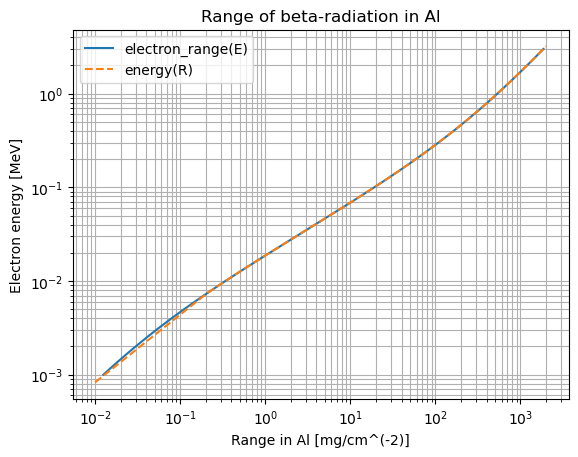

In [5]:
E = np.linspace(0.001,3,10000)
R = np.linspace(0.01,2000,10000)

plt.loglog(electron_range(E),E)
plt.loglog(R,energy(R), linestyle='dashed')                
plt.grid(True, which="both", ls="-")
plt.ylabel("Electron energy [MeV]")
plt.xlabel("Range in Al [mg/cm^(-2)]")
plt.title("Range of beta-radiation in Al")
plt.legend(['electron_range(E)','energy(R)'])
plt.show()

#### <span style='color:darkcyan'> Your functions: </span>

<div class="alert alert-block alert-info">
    <b>Tip</b>: <br/>
    1) Here is the place to <b>define all the functions you need</b> in this notebook. This helps to keep your notebook clear and structured.<br/>
    2) Add <b>comments</b> to your functions (e.g. what is the function good for, what happens in each line, etc.), so that you and your lab partner will still be able to understand the code at a later time.

## 3. Experiments

<div class="alert alert-block alert-info">
    <b>Evaluation of the measurement errors:</b>  <br/>
The fluctuations of the count rate in radioactive decays obey a Poisson-distribution. In that case, the uncertainties package (ufloat, uarray,...) cannot be used to determine the error correctly, since it uses the Gauss distribution.<br/>
    The error for the count rate can easily be calculated with $\Delta N = \sqrt{N}$.

### 3.1 Experiment 1: Counter Tube Characteristic
<span style='color:indigo'> <i>
    Measure the counter tube characteristic and determine the working point voltage (Geiger plateau) $V_S$ as well as the plateau slope $\frac{\Delta N}{\Delta V}$ .</i></span>

#### 3.1.1 Measurement Data

In [6]:
# Messdauer
t1 = ... # [unit]

# Voltage
V1 = ... # [unit]

# Count rate
N1 = ... # [unit]


<span style='color:darkcyan'> <i>Create a table with your data (incl. errors and units).</i></span>

In [7]:
# table

#### 3.1.2 Evaluation

<span style='color:darkcyan'> <i>Plot the count rate $N$ in dependence of the voltage $V$ and determine the slope at the working point, e.g. by a linear fit over the Geiger plateau.</i></span>

<div class="alert alert-block alert-info">
    <b>Tip</b>: <br/>
    For the linear fit: <code>x[a:b]</code> selects all elements of the array <code>x</code> that lie in the interval <code>[a,b]</code>. You can use this for selecting only the x and y-values that lie in the Geiger plateau range. 

In [8]:
# plot with fit

<span style='color:darkcyan'> <i>Print your results.</i></span>

In [9]:
# Working point
V_ideal = ... # [unit]

# slope at the working point
slope_N = ... # [unit]

display(Markdown(f'''
Voltage at the working point: $V_{{ideal}} = {V_ideal} \,V$ \n
Dependence of the count rate on the voltage at $V_{{ideal}}: \\frac{{\\Delta N/N}}{{\\Delta V}} = {slope_N} \,V^{{-1}}$ \n
The smaller $\\frac{{\\Delta N}}{{\\Delta V}}$, the ......  (BETTER/WORSE) is the Geiger counter.  
'''))


Voltage at the working point: $V_{ideal} = Ellipsis \,V$ 

Dependence of the count rate on the voltage at $V_{ideal}: \frac{\Delta N/N}{\Delta V} = Ellipsis \,V^{-1}$ 

The smaller $\frac{\Delta N}{\Delta V}$, the ......  (BETTER/WORSE) is the Geiger counter.  


### 3.2 Experiment 2: Activity of the Source
<span style='color:indigo'> <i>
    Determine the current activity of the radioactive source.</i></span>

#### 3.2.1 Measurement Data

In [10]:
# measurement time
t2 = ... # [unit]

# incoming particles during the time t
N2 = ... # [unit]

# background counts during the time t (with 8mm steel absorber)
N2_BG = ... # [unit]

# effective number of incomig particles during the time t 
# (= [incoming particles] - [background])
N2_eff = ... # [unit]



#### 3.2.2 Evaluation

__Calculation of the solid angle ('Raumwinkel'):__  
What is the solid angle? Note that the source radiates approximately uniformly in all directions. But the detector "sees" only a
fraction of it, the so-called solid angle fraction (called "acceptance").

<div class="alert alert-block alert-info">
    <b>Caution</b>: You will need trigonometric functions - they use <b>radians</b> in python!

In [11]:
# Diameter of the aperture in the slider 
d = ... # [unit]

# Half angle of the cone
theta = ... # [unit]

# acceptance (fraction of the solid angle)  
epsilon = ... # [unit]

__Calculation of the activity:__  

<span style='color:darkcyan'> <i>What is the activity of the source (with the steel foil surrounding it)?</i></span>

In [12]:
# calculation

Within the steel foil, it can be assumed that half of the electrons originate from Strontium and half from Yttrium decays.   
<b>Caution:</b> When passing through the steel foil, the electrons of the two decays are shielded differently, therefore this assumption is not valid in the detector where $N$ is measured!

<span style='color:darkcyan'> <i>What is the activity of the source, if the protective steel foil was removed?</i></span>

In [13]:
# calculation

<span style='color:darkcyan'> <i>Print your results (incl. errors and units).</i></span>

### 3.3 Task 3: Radiologically relevant calculations
<span style='color:indigo'> <i>Answer the following questions. <br/>Please describe briefly the important steps in your calculations.
</i></span>

<span style='color:darkcyan'> <i>a) When has the total activity of the source decreased to 10 kBq?
</i></span>

<span style='color:darkcyan'> <i>b) Assuming the source was produced exactly 70 years ago: What was the activity at the time of production?
</i></span>

<span style='color:darkcyan'> <i>c) How long does it take until the average annual dose in Switzerland (= 5.5 mSv) is reached with complete incorporation of this source?
</i></span>

### 3.4 Eperiment 4: Absorbtion and $\beta$-energy
<span style='color:indigo'> <i>Measure the count rate $N$ as a function of the absorber thickness $x$ and determine the absorption curve.
</i></span><br/>
<b>Hint:</b> Density $\rho (Al) = 2.69\,g\,cm^{-3}$  

#### 3.4.1 Measurement data

<div class="alert alert-block alert-info">
    <b>Tip</b>: To obtain measurement values for as many different thicknesses $x$ as possible, it can be useful to stack the plates on top of each other.

In [14]:
# absorber thickness
x4 = np.arange(0,4.1,0.25) # [mm]

# measurement time
t4 = ... # [unit]

# incoming particles during the time t
N4 = ... # [unit]

#### 3.4.2 Evaluation

In [15]:
# calculation

In [16]:
# table of your data and results

header4 = ['x\n[mm]', 'ρ(Al)*x\n[g cm^(-2)]', 't\n[s]', 'N','N_eff', 'gemessene Aktivität\n[Bq]', 'E(x)\n[MeV]'] 

table4 = [x4,
          17*[0], # replace with your data
          17*[0],
          17*[0],
          17*[0],
          17*[0],
          17*[0]]

precision4 = [None,0,0,0,0,0,0] # replace 0 with agequate values

Table(table4, header4, precision4)

╒════════╤═══════════════╤═══════╤═════╤═════════╤═══════════════════════╤═════════╕
│      x │       ρ(Al)*x │     t │   N │   N_eff │   gemessene Aktivität │    E(x) │
│   [mm] │   [g cm^(-2)] │   [s] │     │         │                  [Bq] │   [MeV] │
╞════════╪═══════════════╪═══════╪═════╪═════════╪═══════════════════════╪═════════╡
│   0    │             0 │     0 │   0 │       0 │                     0 │       0 │
├────────┼───────────────┼───────┼─────┼─────────┼───────────────────────┼─────────┤
│   0.25 │             0 │     0 │   0 │       0 │                     0 │       0 │
├────────┼───────────────┼───────┼─────┼─────────┼───────────────────────┼─────────┤
│   0.5  │             0 │     0 │   0 │       0 │                     0 │       0 │
├────────┼───────────────┼───────┼─────┼─────────┼───────────────────────┼─────────┤
│   0.75 │             0 │     0 │   0 │       0 │                     0 │       0 │
├────────┼───────────────┼───────┼─────┼─────────┼───────────────

<span style='color:darkcyan'> <i>Plot the absorption curve:<br/>
    y-axis: $N/t$<br/>
    x-axis: $x$
</i></span>

In [17]:
# plot

### 3.5 Task 5: Maximum $\beta$-energy
<span style='color:indigo'> <i>From the absorption curve, determine the maximum $\beta$-energy of $^{90}Y$ in different ways.

__a) Determine $E_\max$ from $x_\max$:__

<span style='color:darkcyan'> <i>Plot the absorption curve (logarithmic) to determine $x_\max$:<br/>
    y-axis: $ln(N/t)$<br/>
    x-axis: $x$
</i></span>

In [18]:
# plot

<span style='color:darkcyan'> <i>Calculate $E_\max$. </i></span>

In [19]:
# Maximum penetration depth of the electrons
x_max_5a = ...

# Energy at x_max
E_max_5a = ...

# Energy loss wile passing the steel foil
DeltaE_5a = ...

# Maximum energy directly at the source
E_source_5a = ...

<span style='color:darkcyan'> <i>Print your results (incl. errors and units) </i></span>

In [20]:
display(Markdown(f'''
Maximum penetration depth of the electrons: $\: x_{{max}} = {x_max_5a} \, mm \, Al$ \n
Energy at $x_{{max}}$: $\: E_{{max}} = {E_max_5a} \, MeV $ \n
Energy loss wile passing the steel foil: $\: \Delta E = {DeltaE_5a} \, MeV$ \n
Maximum energy directly at the source: $\: E_{{max,source}} = {E_source_5a} \, MeV$
'''))


Maximum penetration depth of the electrons: $\: x_{max} = Ellipsis \, mm \, Al$ 

Energy at $x_{max}$: $\: E_{max} = Ellipsis \, MeV $ 

Energy loss wile passing the steel foil: $\: \Delta E = Ellipsis \, MeV$ 

Maximum energy directly at the source: $\: E_{max,source} = Ellipsis \, MeV$


__b) Determine $E_\max$ from $\mu$:__

<span style='color:darkcyan'> <i>Plot the absorption curve (logarithmic) and fit it with a straight line where $x < x_\max$ to find the coefficient $\mu$:<br/>
    y-axis: $ln(N/t)$<br/>
    x-axis: $x$
</i></span>

In [21]:
# plot with linear fit

<span style='color:darkcyan'> <i>Calculate $E_\max$. </i></span>

In [22]:
# Maximum penetration depth of the electrons
mu_5b = ...

# Energy at x_max
E_max_5b = ...

# Energy loss wile passing the steel foil
DeltaE_5b = ...

# Maximum energy directly at the source
E_source_5b = ...

<span style='color:darkcyan'> <i>Print your results (incl. errors and units) </i></span>

In [25]:
display(Markdown(f'''
Coefficient $\mu$: $\: \mu = {mu_5b} \, mm \, Al$ \n
Energy at $x_{{max}}$: $\: E_{{max}} = {E_max_5b} \, MeV $ \n
Energy loss wile passing the steel foil: $\: \Delta E = {DeltaE_5b} \, MeV$ \n
Maximum energy directly at the source: $\: E_{{max,source}} = {E_source_5b} \, MeV$
'''))


Coefficient $\mu$: $\: \mu = Ellipsis \, mm \, Al$ 

Energy at $x_{max}$: $\: E_{max} = Ellipsis \, MeV $ 

Energy loss wile passing the steel foil: $\: \Delta E = Ellipsis \, MeV$ 

Maximum energy directly at the source: $\: E_{max,source} = Ellipsis \, MeV$


## 4 Discussion

<span style='color:darkcyan'> <i>Are your results realistic? Why (not)? Comparison with theory? </i></span>

<span style='color:darkcyan'> <i>What measurement errors were assumed? Why? <br/>
    What are the main reasons for the errors in your results and how do they come about?</i></span>

<span style='color:darkcyan'> <i>How would you try to reduce the error further? Could you improve the accuracy of the experiment? </i></span>

<span style='color:darkcyan'> <i>If you were to repeat the experiment, what would you do differently and why?</i></span>